In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os

In [13]:
img = cv2.imread('./computer_vision/fig/puppy.bmp', cv2.IMREAD_COLOR)

if img is None:
    print('img read failed')
    sys.exit()
    
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image',img)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord('q'):
        break
        
cv2.destroyAllWindows()

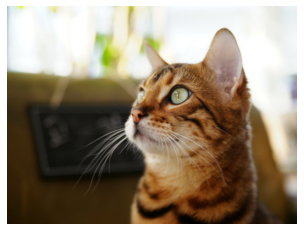

In [18]:
imgBGR = cv2.imread('./computer_vision/fig/cat.bmp',1)

if imgBGR is None:
    print('image read failed')
    sys.exit()
    
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.axis('off')
plt.show()

In [2]:
import glob

In [3]:
img_files = glob.glob('./computer_vision/fig/images1/*.*')

# print(img_files)

cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
    img = cv2.imread(img_files[idx])
    
    
    if img is None:
        print('image read failed')
        break
        
    cv2.imshow('scene',img)
    
    if cv2.waitKey(300) == 27:
        break
    
    idx += 1
    
    if idx >= len(img_files):
        idx = 0
        
cv2.destroyAllWindows()

In [5]:
img1 = np.zeros((400,600,3), np.uint8)
img2 = np.ones((400,600), np.uint8) * 255
img3 = np.full((400,600,3), (255,255,0), np.uint8)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
src = cv2.imread('./computer_vision/fig/fig/cow.png')
dst = cv2.imread('./computer_vision/fig/fig/green.png')


src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(src_gray, 244,255, cv2.THRESH_BINARY_INV)


h,w = src.shape[:2]
crop = dst[200:200+h, 300:300+w]

cv2.copyTo(src, mask, crop)


cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)


cv2.waitKey()
cv2.destroyAllWindows()


In [25]:
img = np.full((600,1200,3),(255,255,255), np.uint8)

cv2.line(img, (50, 100), (300,200), (0,0,255), 5)
cv2.arrowedLine(img, (300,200), (300,300),(0,0,255),5)
cv2.rectangle(img, (100,400),(300,500), (0,0,255), 5)
cv2.rectangle(img, (150,450,200,100), (0,0,255), 5)

cv2.circle(img, (600,300), 100, (255,0,0), 3, cv2.LINE_AA)
cv2.ellipse(img, (600,300), (200,100), 20, 0, 270,(0,0,255), 3, cv2.LINE_AA)

cv2.putText(img, 'Welcome to computer vision', (600,500), cv2.FONT_HERSHEY_SIMPLEX,
           1, (0,0,255),2, cv2.LINE_AA)





cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('webcam_video.avi', fourcc, fps, (w,h))
    
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('image opend failed')
        break
    
    out.write(frame)
    edge = cv2.Canny(frame, 50, 150)
    cv2.imshow('edge',edge)
    cv2.imshow('image', frame)
    
    if cv2.waitKey(30)  == 27:
        break
    
cap.release()
out.release()
cv2.destroyAllWindows()
    

In [ ]:
##-------------review---------------

In [4]:
## keyboard event

img = cv2.imread('./computer_vision/fig/fig/puppy.bmp', cv2.IMREAD_GRAYSCALE)

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
    
    elif key == ord('i'):
        img = 255 - img
        cv2.imshow('image', img)
    
    elif key == ord('e'):
        img = cv2.Canny(img, 50, 150)
        cv2.imshow('image', img)
    
#     elif key == ord('r'):
#         img == cv2.imshow('image', img1)
    
cv2.destroyAllWindows()

In [3]:
## keyboard event

img = cv2.imread('./computer_vision/fig/fig/puppy.bmp', cv2.IMREAD_GRAYSCALE)

if img is None:
    print('image read failed')
    sys.exit()

img2 = img.copy()    
    
cv2.imshow('image', img)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
    
    elif key == ord('i'):
        img = 255 - img
        cv2.imshow('image', img)
    
    elif key == ord('e'):
        img = cv2.Canny(img, 50, 150)
        cv2.imshow('image', img)
    
    elif key == ord('s'):
        img == cv2.imwrite('./puppymang.jpg', img)
        
    elif key == ord('r'):
        img = img2.copy()
        cv2.imshow('image', img)
    
cv2.destroyAllWindows()

In [7]:
## Mouse call
# onMouse(evnet, x,y, flags, param) - > None
# event : 마우스 이벤트 종료 e.g, cv2.EVENT_LBUTTONDOWN
# x,y : 창을 기준으로 이벤트 발생좌표
# flags : 이벤트 발생시 발생상태 e.g, 'ctrl'
# param : cv2.setMouseCallback()함수에서 설정한 데이터 
def mouse_call(event, x, y, flags, param):
    
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print('left button down = {}, {}'.format(x,y))

    elif event == cv2.EVENT_LBUTTONUP:
        print('left button up = {}, {}'.format(x,y))
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            print('Mouse move = {}, {}'.format(x,y))
        
img = np.ones((600,800,3), np.uint8)*255

cv2.namedWindow('image')
# cv2.setMouseCallback(windowName, onMouse [, param]) -> None
    # windowName : 마우스 이벤트를 수행할 창 이름
    # onMouse :
    # param : 콜벡함수
cv2.setMouseCallback('image', mouse_call, img)



cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
def mouse_call(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x,y
        
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx,oldy), (x,y), (0,0,0), 4, cv2.LINE_AA)
            cv2.imshow('image', img)
            oldx, oldy = x,y
            
    
        
img = np.ones((600,800,3), np.uint8)*255

cv2.namedWindow('image')
# cv2.setMouseCallback(windowName, onMouse [, param]) -> None
    # windowName : 마우스 이벤트를 수행할 창 이름
    # onMouse :
    # param : 콜벡함수
cv2.setMouseCallback('image', mouse_call, img)

cv2.imshow('image',img)


while True:
    key = cv2.waitKey()
    if key == ord('s'):
        cv2.imwrite('./sign.png', img)
    
    elif key == 27:
        break

# cv2.waitKey()
cv2.destroyAllWindows()

In [22]:
def call_track(pos):
#     print(pos)
    img[:] = pos
    cv2.imshow('image', img)

img = np.zeros((500,600), np.uint8)


cv2.namedWindow('image')
#cv2.createTrackbar(trackbarName, windowName, value, count, onChange) -> None
cv2.createTrackbar('level', 'image', 0,255, call_track)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
def call_track(pos):
#     print(pos)
    img[:] = np.round(img1*(pos/255),0)
    cv2.imshow('image', img)

# img = np.zeros((500,600), np.uint8)
img = cv2.imread('./computer_vision/fig/cat.bmp', cv2.IMREAD_GRAYSCALE)
img1 = img.copy()

cv2.namedWindow('image')
#cv2.createTrackbar(trackbarName, windowName, value, count, onChange) -> None
cv2.createTrackbar('level', 'image', 0,255, call_track)

cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: module 'numpy' has no attribute 'img'